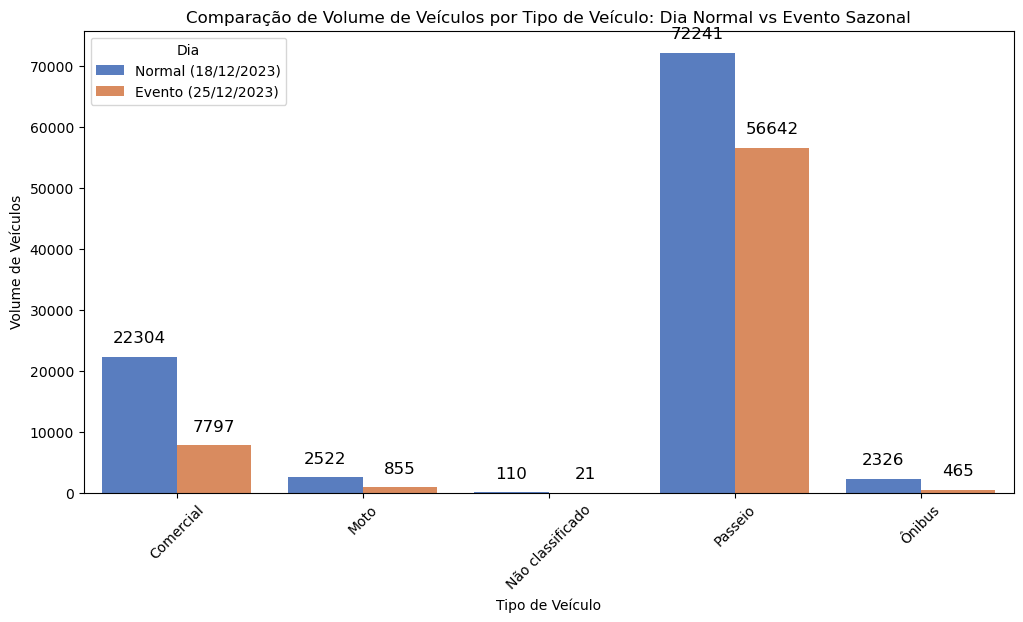

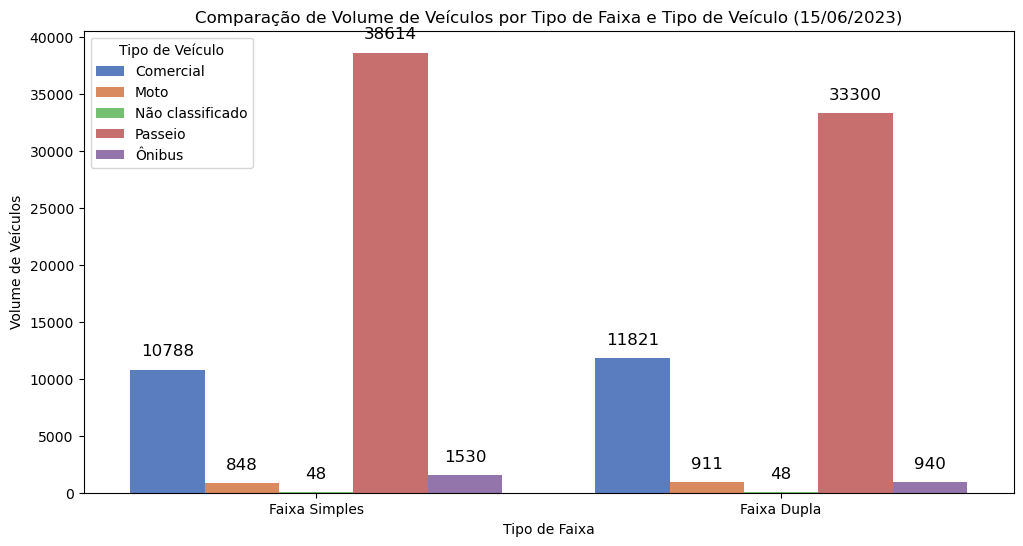

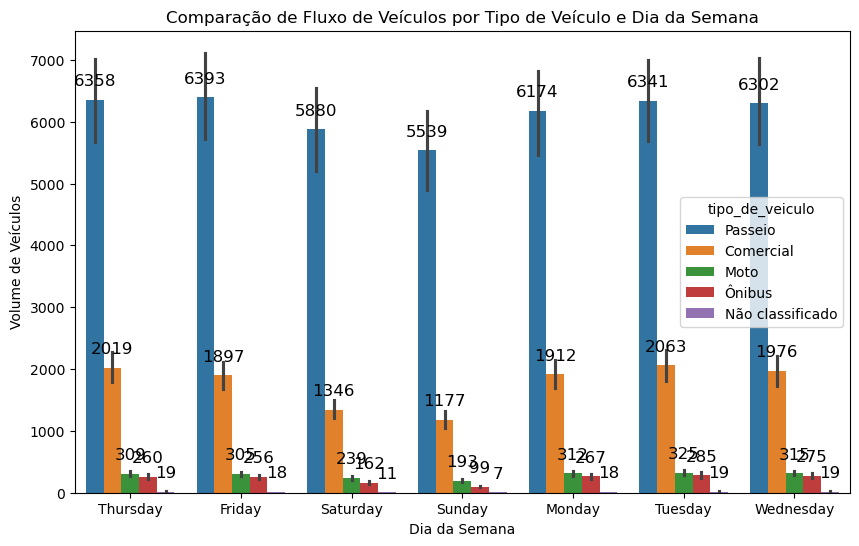

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Dados
data = pd.read_csv('trafego_veiculos_radares.csv', encoding='latin1', delimiter=';')

#Transformações
data['data_da_passagem'] = pd.to_datetime(data['data_da_passagem'], format='%d/%m/%Y', errors='coerce')
data['dia_da_semana'] = data['data_da_passagem'].dt.day_name()

#Filtro para o dia de evento (25/12/2023) e dia normal (18/12/2023)
data_normal = data[data['data_da_passagem'] == pd.Timestamp('2023-12-18')]
data_evento = data[data['data_da_passagem'] == pd.Timestamp('2023-12-25')]

#Calcula o volume total de veículos por tipo de veículo
data_normal_grouped = data_normal.groupby('tipo_de_veiculo')['volume_total'].sum().reset_index()
data_evento_grouped = data_evento.groupby('tipo_de_veiculo')['volume_total'].sum().reset_index()

#Adiciona uma coluna para um dia normal e outro de um evento sazonal (natal)
data_normal_grouped['dia'] = 'Normal (18/12/2023)'
data_evento_grouped['dia'] = 'Evento (25/12/2023)'

#Combina as duas colunas para comparação
data_comparacao = pd.concat([data_normal_grouped, data_evento_grouped])

#Gráfico comparando o volume de veículos por tipo de veículo nos dias normal e evento
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='tipo_de_veiculo', y='volume_total', hue='dia', data=data_comparacao, palette='muted')

#Ajusta os números exatos nas barras
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2.
#Verifica a altura das barras para colocar o dado sobre eles
    if height > 0:
        ax.annotate(f'{height:.0f}', 
                    (x, height), 
                    ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=12, color='black', 
                    xytext=(0, 8) if height > 0 else (0, -8), textcoords='offset points')

plt.title('Comparação de Volume de Veículos por Tipo de Veículo: Dia Normal vs Evento Sazonal')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Volume de Veículos')
plt.xticks(rotation=45)
plt.legend(title='Dia', loc='upper left')
plt.show()

#Filtro para o dia de análise (15/06/2023)
data_15_06 = data[data['data_da_passagem'] == pd.Timestamp('2023-06-15')]

#Calcula o volume total de veículos por tipo de faixa e tipo de veículo
data_faixa_grouped = data_15_06.groupby(['faixa_da_passagem', 'tipo_de_veiculo'])['volume_total'].sum().reset_index()

#Substitui os valores da faixa (1 para Faixa Simples e 2 para Faixa Dupla)
data_faixa_grouped['faixa_da_passagem'] = data_faixa_grouped['faixa_da_passagem'].map({1: 'Faixa Simples', 2: 'Faixa Dupla'})

#Gráfico comparando o volume total de veículos por tipo de faixa e tipo de veículo
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='faixa_da_passagem', y='volume_total', hue='tipo_de_veiculo', data=data_faixa_grouped, palette='muted')

#Ajusta os números exatos nas barras
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2.
#Verifica a altura das barras para colocar o dado sobre eles
    if height > 0:
        ax.annotate(f'{height:.0f}', 
                    (x, height), 
                    ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=12, color='black', 
                    xytext=(0, 8) if height > 0 else (0, -8), textcoords='offset points')

plt.title('Comparação de Volume de Veículos por Tipo de Faixa e Tipo de Veículo (15/06/2023)')
plt.xlabel('Tipo de Faixa')
plt.ylabel('Volume de Veículos')
plt.legend(title='Tipo de Veículo', loc='upper left')
plt.show()

#Compara o de Fluxo de Veículos por Tipo de Veículo e Dia da Semana
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='dia_da_semana', y='volume_total', hue='tipo_de_veiculo', data=data)

#Ajusta os números exatos nas barras
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2.
#Verifica a altura das barras para colocar o dado sobre eles
    if height > 0:
        ax.annotate(f'{height:.0f}', 
                    (x, height), 
                    ha='center', va='bottom' if height > 0 else 'top', 
                    fontsize=12, color='black', 
                    xytext=(0, 8) if height > 0 else (0, -8), textcoords='offset points')

plt.title('Comparação de Fluxo de Veículos por Tipo de Veículo e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Volume de Veículos')
plt.show()